# **Time analysis**

In [84]:
import pandas as pd
import seaborn as sns
import numpy as np

import os

import data_handling
import plots
import constants

## **Constants**

In [85]:
METRIC_EVALUATION_FOLDER = constants.METRIC_EVALUATION_FOLDER
TIME_RESULTS = os.path.join(METRIC_EVALUATION_FOLDER, 'time_evaluation.csv')

## **Dataset**

In [86]:
df = pd.read_csv(TIME_RESULTS)
df.tail()

,date,model_name,source,target,score_type,score,epoch,parameters
135,2023-07-04 21:14:15.109596,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.647376,180,{'train-sets': ['/docker/home/marianmt/artifac...
136,2023-07-04 21:14:21.549506,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.741461,190,{'train-sets': ['/docker/home/marianmt/artifac...
137,2023-07-04 21:14:21.549506,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.647376,190,{'train-sets': ['/docker/home/marianmt/artifac...
138,2023-07-04 21:14:28.018792,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.741461,200,{'train-sets': ['/docker/home/marianmt/artifac...
139,2023-07-04 21:14:28.018792,gn_es_test_grid_july_type_transformer.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,23.647376,200,{'train-sets': ['/docker/home/marianmt/artifac...


**Add time column**

In [87]:
df['date'] = pd.to_datetime(df['date'])

In [88]:
# Calculate duration between each score
df['duration'] = df[df['score_type'] == 'sacrebleu_corpus_chrf']['date'].diff().dt.total_seconds()

# Remove first time for each model (as it is being compared with an undefined value)
for idx, row in df.iterrows():
    if row['epoch'] == 10:
        df.loc[idx, 'duration'] = np.nan

# Remove 0 values
min_threshold = 10
max_threshold = 500
df['duration'] = df['duration'].apply(lambda x: x if x > min_threshold else np.nan)
df['duration'] = df['duration'].apply(lambda x: x if x < max_threshold else np.nan)

df.head()

,date,model_name,source,target,score_type,score,epoch,parameters,duration
0,2023-07-11 08:46:30.334846,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.146996,10,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
1,2023-07-11 08:46:30.334846,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,25.118142,10,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
2,2023-07-11 08:51:32.160479,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,5.210192,20,{'train-sets': ['/docker/home/marianmt/artifac...,NaN
3,2023-07-11 08:51:32.160479,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_chrf,25.079789,20,{'train-sets': ['/docker/home/marianmt/artifac...,301.825633
4,2023-07-11 08:56:34.078529,gn_es_july_transformer_cpu_nodenode23.npz,valid_gn.txt.gn,valid_es.txt.es,sacrebleu_corpus_bleu,4.924341,30,{'train-sets': ['/docker/home/marianmt/artifac...,NaN


In [89]:
df.groupby('model_name')['duration'].describe()

,count,mean,std,min,25%,50%,75%,max
model_name,,,,,,,,
gn_es_july_transformer_cpu_nodenode23.npz,8.0,303.515331,3.213168,298.622040,301.894946,302.438503,305.784137,308.268837
gn_es_july_transformer_cpu_nodenode23_2.npz,9.0,298.962907,5.791653,291.374117,294.015934,298.289615,303.840285,308.186843
gn_es_july_transformer_cpu_nodenode23_3.npz,9.0,298.225674,10.328386,277.896649,290.173931,301.644904,303.489797,308.790947
gn_es_july_transformer_cpu_nodenode23_4.npz,9.0,300.497223,5.707338,289.255318,298.796212,302.563815,304.203125,306.471489
gn_es_test_grid_july_type_transformer.npz,10.0,399.886077,14.250755,366.704329,399.548493,404.373157,408.164535,413.574565


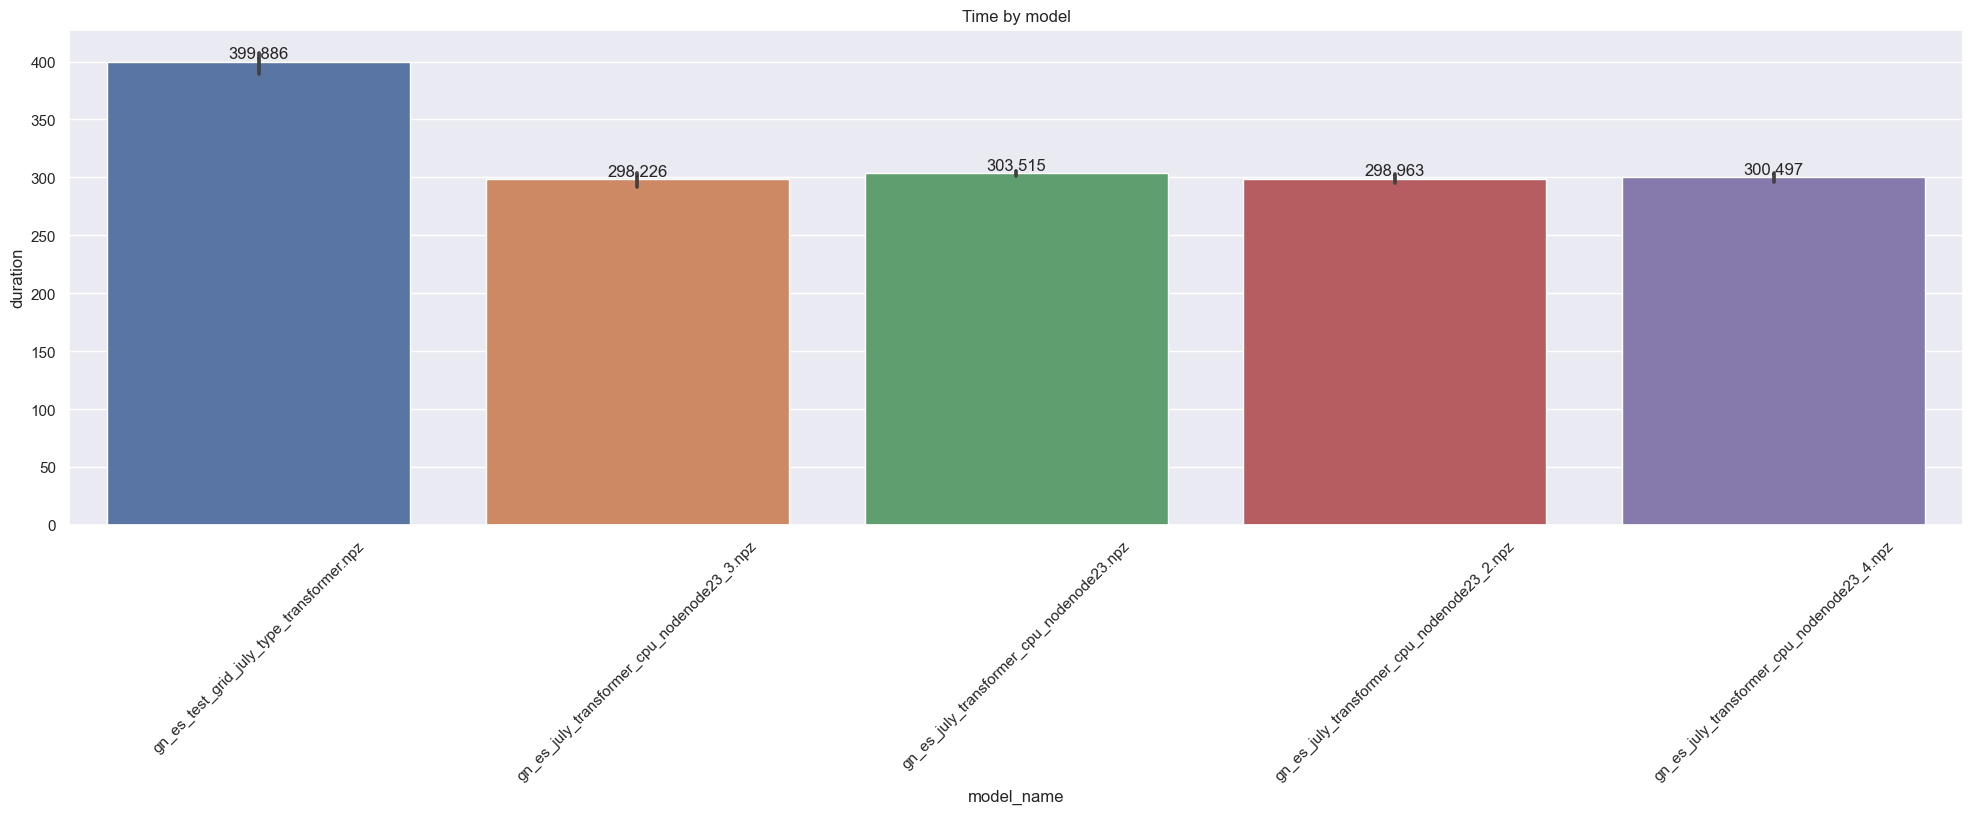

In [90]:
plots.plot_time_by_model(df, title='Time by model')

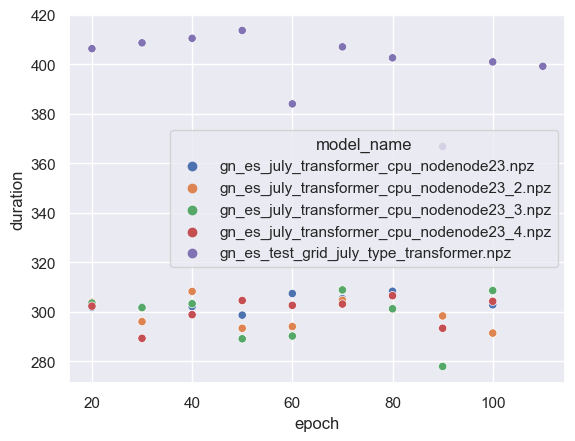

In [100]:
sns.scatterplot(x='epoch', y='duration', hue='model_name', data=df[~df['duration'].isna()]);

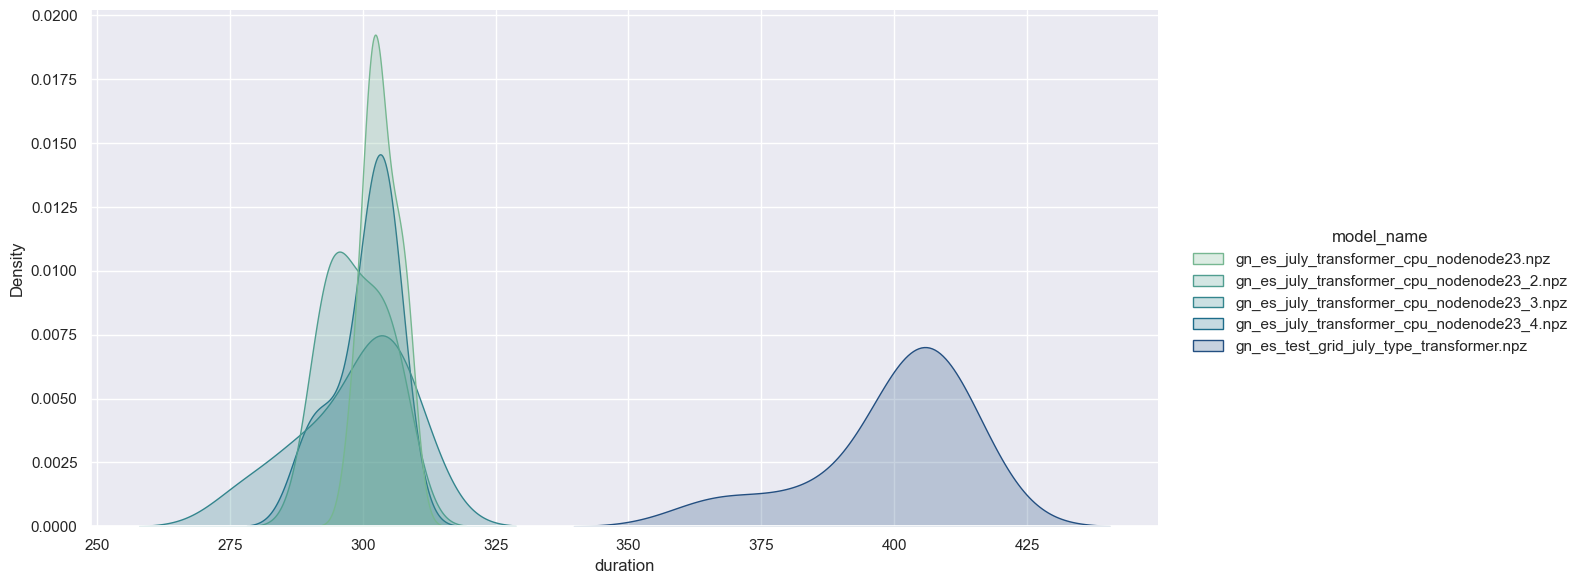

In [101]:
sns.displot(df[~df['duration'].isna()], x='duration', hue='model_name', kind='kde', fill=True, palette='crest', height=6, aspect=2);